<a href="https://colab.research.google.com/github/RafsanHasanPronoy/BlackList/blob/main/potato_efficientnetb7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas pillow

In [ ]:
!pip install pandas
!pip install opencv-python

In [ ]:
!pip install tensorflow==2.12.0
!pip install keras

In [ ]:
import numpy as np
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
import os
from tensorflow import keras
import glob as gb
import pandas as pd
from tensorflow.keras.preprocessing import image_dataset_from_directory
# Import RandomFlip and RandomRotation from the preprocessing module
from tensorflow.keras.layers.experimental.preprocessing import RandomFlip, RandomRotation
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPool2D, LeakyReLU

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory

# ✅ Update this with the correct dataset folder path in Kaggle
dataset_path = "/kaggle/input/potato-leaf/Potato Leaf Diseases Dataset From Bangladesh"

# ✅ Load dataset from the local directory
train_dataset = image_dataset_from_directory(
    dataset_path,  # ✅ Use the correct local path
    shuffle=True,
    labels='inferred',
    batch_size=32,
    image_size=(224, 224),  # Adjust according to your model
    validation_split=0.2,  # 20% validation data
    subset="training",
    seed=42
)

validation_dataset = image_dataset_from_directory(
    dataset_path,  # ✅ Use the correct local path
    shuffle=True,
    labels='inferred',
    batch_size=32,
    image_size=(224, 224),
    validation_split=0.2,
    subset="validation",
    seed=42
)

print("Dataset loaded successfully!")


Found 8286 files belonging to 3 classes.
Using 6629 files for training.
Found 8286 files belonging to 3 classes.
Using 1657 files for validation.
Dataset loaded successfully!


In [ ]:
class_names = train_dataset.class_names
class_names

['Potato___Early_Blight', 'Potato___Healthy', 'Potato___Late_Blight']

✅ Dataset found at /kaggle/input/potato-leaf/Potato Leaf Diseases Dataset From Bangladesh
✅ Found 3 categories: ['Potato___Early_Blight', 'Potato___Healthy', 'Potato___Late_Blight']


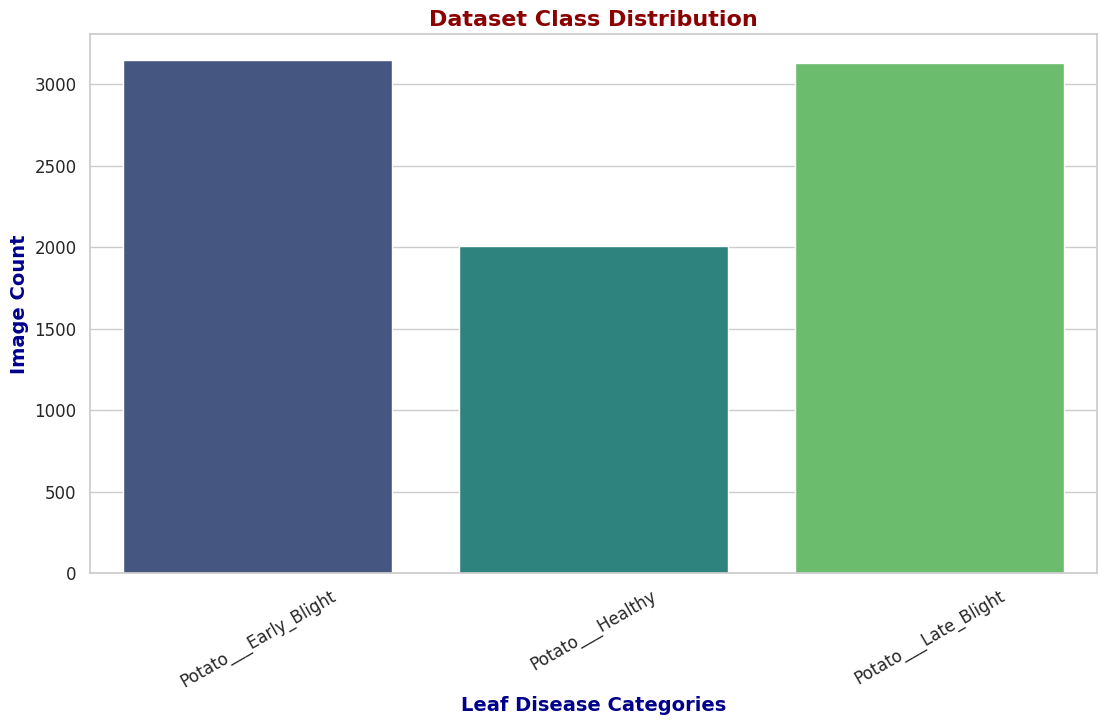

In [ ]:
import os
import seaborn as sns
import matplotlib.pyplot as plt
import glob as gb
import pandas as pd

# ✅ Ensure Kaggle dataset is correctly mounted
dataset_path = "/kaggle/input/potato-leaf/Potato Leaf Diseases Dataset From Bangladesh"

# ✅ Check if dataset exists
if not os.path.exists(dataset_path):
    print(f"⚠️ Dataset not found at {dataset_path}. Please check the dataset location.")
else:
    print(f"✅ Dataset found at {dataset_path}")

sns.set_theme(style="whitegrid")
Data_imbalance = []
class_names = []

# ✅ Ensure folders exist and load images
for folder in sorted(os.listdir(dataset_path)):  # Sort to keep order consistent
    folder_path = os.path.join(dataset_path, folder)
    if os.path.isdir(folder_path):  # Ensure it's a directory
        files = gb.glob(os.path.join(folder_path, "*.*"))  # ✅ Use os.path.join for compatibility
        if len(files) > 0:  # ✅ Only append if images exist
            Data_imbalance.append(len(files))
            class_names.append(folder)  # ✅ Collect class names dynamically

# ✅ Check if data is loaded
if not Data_imbalance:
    print("⚠️ No image data found! Please check dataset structure.")
else:
    print(f"✅ Found {len(class_names)} categories: {class_names}")

    # ✅ Convert to Pandas DataFrame
    df = pd.DataFrame({"Class": class_names, "Count": Data_imbalance})

    plt.figure(figsize=(13, 7))

    # ✅ Use a vibrant color palette
    colors = sns.color_palette("viridis", len(class_names))  # Try: "magma", "coolwarm", "rocket"

    sns.barplot(data=df, x="Class", y="Count", palette=colors)  # ✅ Apply color gradient
    plt.xticks(rotation=30, fontsize=12)
    plt.yticks(fontsize=12)
    plt.xlabel("Leaf Disease Categories", fontsize=14, fontweight="bold", color="darkblue")
    plt.ylabel("Image Count", fontsize=14, fontweight="bold", color="darkblue")
    plt.title("Dataset Class Distribution", fontsize=16, fontweight="bold", color="darkred")

    plt.show()  # ✅ Explicitly show the plot


In [ ]:
total = 0
for i in range(0,len(Data_imbalance)) :
    total +=Data_imbalance[i]

weight_for_0 = (1 / Data_imbalance[0]) * (total / 4.0)
weight_for_1 = (1 / Data_imbalance[1]) * (total / 4.0)
weight_for_2 = (1 / Data_imbalance[2]) * (total / 4.0)

class_weight = {0: weight_for_0, 1: weight_for_1, 2: weight_for_2}

print('Weight for class 0: {:.2f}'.format(weight_for_0))
print('Weight for class 1: {:.2f}'.format(weight_for_1))
print('Weight for class 2: {:.2f}'.format(weight_for_2))


Weight for class 0: 0.66
Weight for class 1: 1.03
Weight for class 2: 0.66


In [ ]:
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.RandomFlip("horizontal"),
  tf.keras.layers.RandomRotation(0.2),
  tf.keras.layers.RandomZoom(0.2),
  tf.keras.layers.RandomHeight(0.2),
  tf.keras.layers.RandomWidth(0.2),
])

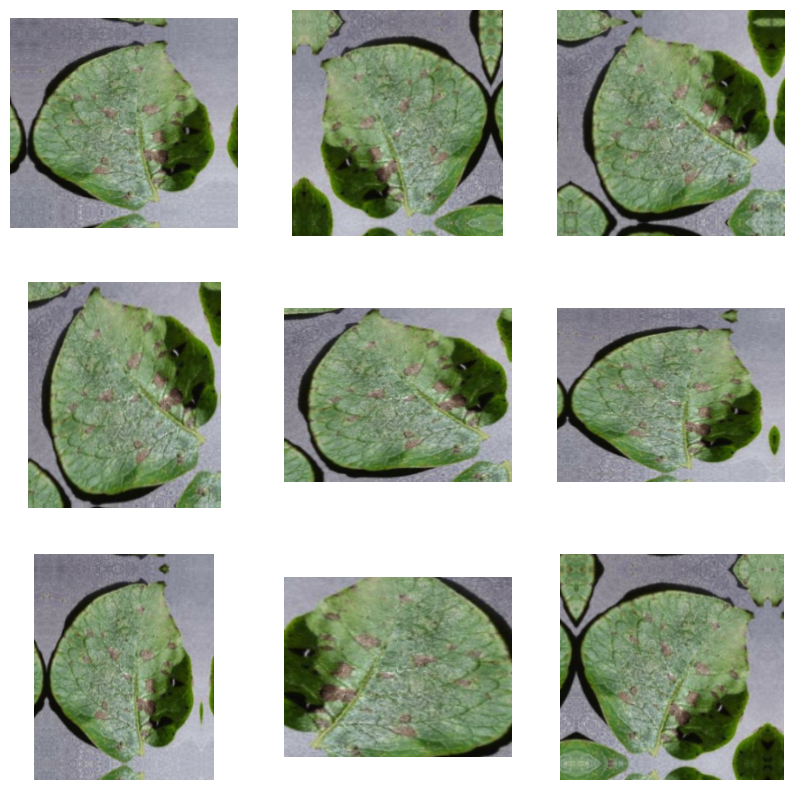

In [ ]:
for image, _ in train_dataset.take(1):
    plt.figure(figsize=(10, 10))
    first_image = image[0]
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        augmented_image = data_augmentation(tf.expand_dims(first_image, 0))
        plt.imshow(augmented_image[0] / 255)
        plt.axis('off')

Potato___Early_Blight

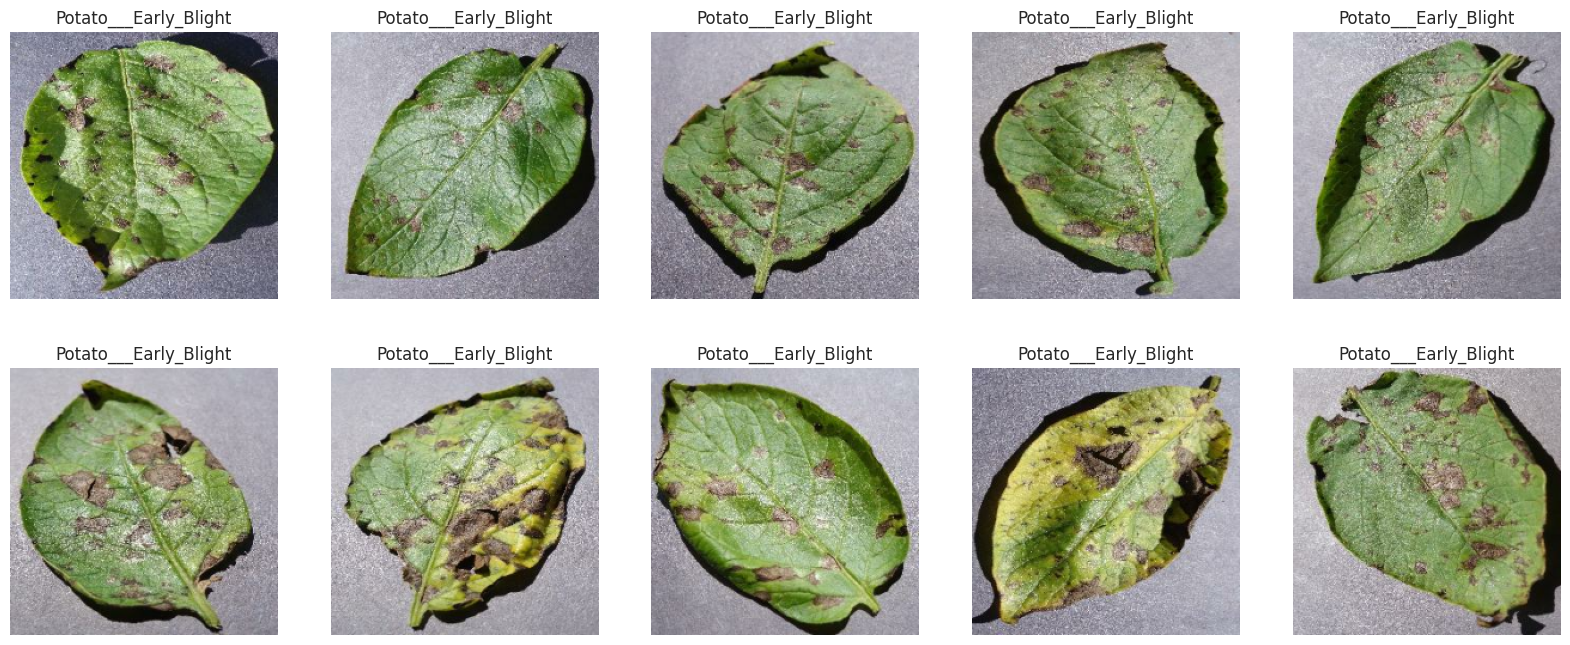

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,8))

Potato___Early_Blight = []
Potato___Late_Blight = []

# Take one batch of images & labels
for images, labels in train_dataset.take(1):
    labels = labels.numpy()  # Convert Tensor to NumPy array

    for i in range(min(100, len(labels))):  # Avoid out-of-bounds error
        label_index = int(labels[i])  # Convert Tensor to integer
        class_name = class_names[label_index]  # Get class name

        if class_name == "Potato___Early_Blight":
            Potato___Early_Blight.append(images[i].numpy().astype("uint8"))
        elif class_name == "Potato___Late_Blight":
            Potato___Late_Blight.append(images[i].numpy().astype("uint8"))

# Ensure at least 10 images exist before plotting
num_images = min(10, len(Potato___Early_Blight))
for i in range(num_images):
    plt.subplot(2, 5, i + 1)
    plt.imshow(Potato___Early_Blight[i])
    plt.axis("off")
    plt.title("Potato___Early_Blight")

plt.show()


**Downy_Mildew**

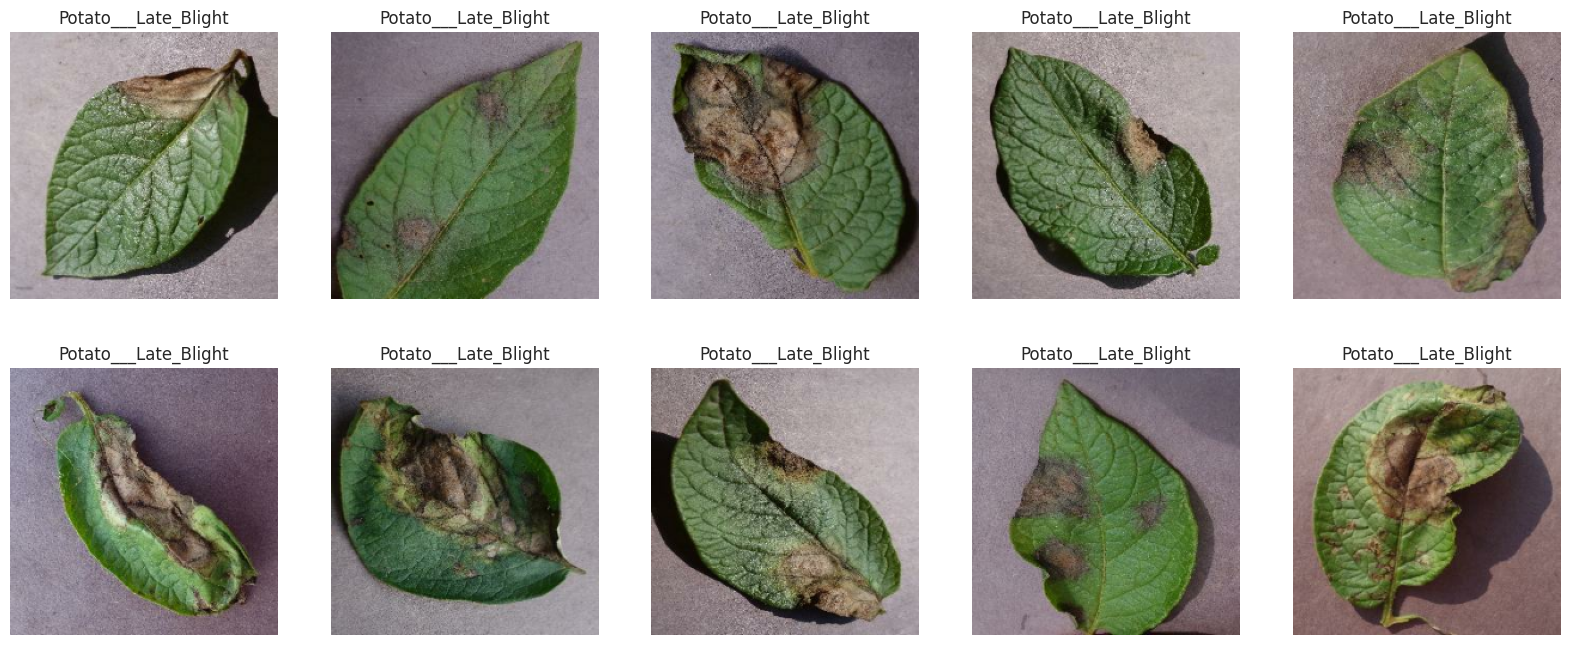

In [ ]:
plt.figure(figsize=(20,8))

# Ensure Downy_Mildew is not empty
if len(Potato___Late_Blight) == 0:
    print("⚠️ No images found for 'Potato___Late_Blight'. Please check dataset labeling.")
else:
    num_images = min(10, len(Potato___Late_Blight))  # Avoid out-of-bounds error
    for i in range(num_images):
        plt.subplot(2, 5, i+1)
        plt.imshow(Potato___Late_Blight[i])
        plt.axis("off")
        plt.title("Potato___Late_Blight")

    plt.show()


In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)

**Modeling**

In [ ]:
import tensorflow as tf

IMG_SIZE = (600, 600)  # EfficientNetB7 typically uses 600x600 input size
IMG_SHAPE = IMG_SIZE + (3,)

base_model = tf.keras.applications.EfficientNetB7(input_shape=IMG_SHAPE, include_top=False, weights='imagenet')


258076736/258076736 [==============================] - 10s 0us/step


In [ ]:
type(base_model)
preprocess_input = tf.keras.applications.efficientnet.preprocess_input


In [ ]:
nb_layers = len(base_model.layers)
print("Number of Layers =", nb_layers)
print(base_model.layers[nb_layers - 2].name)  # Pre-last layer name
print(base_model.layers[nb_layers - 1].name)  # Last layer name


Number of Layers = 814
top_bn
top_activation


In [ ]:
# Make sure you're using EfficientNetB7 and not InceptionV3
from tensorflow.keras.applications import EfficientNetB7
from tensorflow.keras.applications.efficientnet import preprocess_input

# Define EfficientNetB7 as the base model
# Change input shape to (224, 224, 3) to match the dataset
base_model = EfficientNetB7(input_shape=(224, 224, 3), include_top=False, weights='imagenet')

# Ensure the input batch is correctly preprocessed
image_batch, label_batch = next(iter(train_dataset))  # 32 image arrays

# Preprocess the images for EfficientNetB7
image_batch = preprocess_input(image_batch)

# Pass the preprocessed image batch to the base model
feature_batch = base_model(image_batch)  # Run the model on those 32 images

print(feature_batch.shape)  # This should print (32, H, W, 2560) depending on the output of the base model

(32, 7, 7, 2560)


**EfficientNet B7**

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import EfficientNetB7
from tensorflow.keras.preprocessing import image_dataset_from_directory

# ✅ Define image size to match the dataset (224x224)
IMG_SIZE = (224, 224)

def plant_leaf_model(image_shape=IMG_SIZE):
    ''' Define a tf.keras model for multi-class classification using EfficientNetB7 '''
    image_shape = image_shape + (3,)  # Adding channel dimension

    # EfficientNetB7 model without the top layers (include_top=False)
    # ✅ Change input_shape to match IMG_SIZE
    base_model = EfficientNetB7(input_shape=image_shape, include_top=False, weights='imagenet')
    base_model.trainable = True  # Fine-tuning the pre-trained model

    # Freeze some layers to prevent retraining (optional)
    for layer in base_model.layers[:-50]:  # Freeze the first layers (you can adjust this)
        layer.trainable = False

    # Build the custom model using the pre-trained EfficientNetB7
    inputs = tf.keras.Input(shape=image_shape)
    x = data_augmentation(inputs)  # Your data augmentation layer (if any)
    x = preprocess_input(inputs)   # Apply EfficientNetB7 preprocessing
    x = base_model(x, training=False)  # Use the pre-trained base model
    x = layers.GlobalAveragePooling2D()(x)  # Global pooling layer
    x = layers.Dropout(0.2)(x)  # Dropout for regularization
    prediction_layer = layers.Dense(5, activation="softmax")  # 5 output classes # ✅ Adjust based on the number of classes you have
    outputs = prediction_layer(x)

    model = models.Model(inputs, outputs)
    model.summary()  # Print the model summary
    return model

# Use the model
model = plant_leaf_model(image_shape=IMG_SIZE)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb7 (Functional)  (None, 7, 7, 2560)       64097687  
                                                                 
 global_average_pooling2d (G  (None, 2560)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dropout (Dropout)           (None, 2560)              0         
                                                                 
 dense (Dense)               (None, 5)                 12805     
                                                                 
Total params: 64,110,492
Trainable params: 21,729,765
Non-trainable params: 42,380,727
________________________________________

In [ ]:
Plant_Leaf_Model = plant_leaf_model(IMG_SIZE)


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb7 (Functional)  (None, 7, 7, 2560)       64097687  
                                                                 
 global_average_pooling2d_1   (None, 2560)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dropout_1 (Dropout)         (None, 2560)              0         
                                                                 
 dense_1 (Dense)             (None, 5)                 12805     
                                                                 
Total params: 64,110,492
Trainable params: 21,729,765
Non-trainable params: 42,380,727
______________________________________

In [ ]:
base_learning_rate = 0.001
Plant_Leaf_Model.compile(optimizer=tf.keras.optimizers.Nadam(learning_rate=base_learning_rate),
                         loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                         metrics=['accuracy'])


In [ ]:
history = Plant_Leaf_Model.fit(train_dataset , verbose=2 , epochs=10 ,class_weight=class_weight,
                               validation_data=validation_dataset , use_multiprocessing= True)

Epoch 1/10
208/208 - 2514s - loss: 0.0691 - accuracy: 0.9659 - val_loss: 0.2974 - val_accuracy: 0.8932 - 2514s/epoch - 12s/step
Epoch 2/10
208/208 - 2486s - loss: 0.5537 - accuracy: 0.8914 - val_loss: 0.0181 - val_accuracy: 0.9940 - 2486s/epoch - 12s/step
Epoch 3/10
208/208 - 2449s - loss: 0.0128 - accuracy: 0.9950 - val_loss: 0.0115 - val_accuracy: 0.9952 - 2449s/epoch - 12s/step
Epoch 4/10
208/208 - 2456s - loss: 0.0049 - accuracy: 0.9976 - val_loss: 0.0134 - val_accuracy: 0.9982 - 2456s/epoch - 12s/step
Epoch 5/10
208/208 - 2466s - loss: 0.0039 - accuracy: 0.9985 - val_loss: 0.0207 - val_accuracy: 0.9964 - 2466s/epoch - 12s/step
Epoch 6/10
208/208 - 2340s - loss: 0.0085 - accuracy: 0.9967 - val_loss: 0.0049 - val_accuracy: 0.9994 - 2340s/epoch - 11s/step
Epoch 7/10
208/208 - 2446s - loss: 0.0030 - accuracy: 0.9995 - val_loss: 0.0143 - val_accuracy: 0.9946 - 2446s/epoch - 12s/step
Epoch 8/10
208/208 - 2375s - loss: 0.0107 - accuracy: 0.9968 - val_loss: 0.0223 - val_accuracy: 0.9940 -

In [ ]:
Plant_Leaf_Model.evaluate(validation_dataset , verbose = 1)

52/52 [==============================] - 63s 1s/step - loss: 1.2290e-06 - accuracy: 1.0000


[1.2290338418097235e-06, 1.0]

1/1 [==============================] - 0s 53ms/step


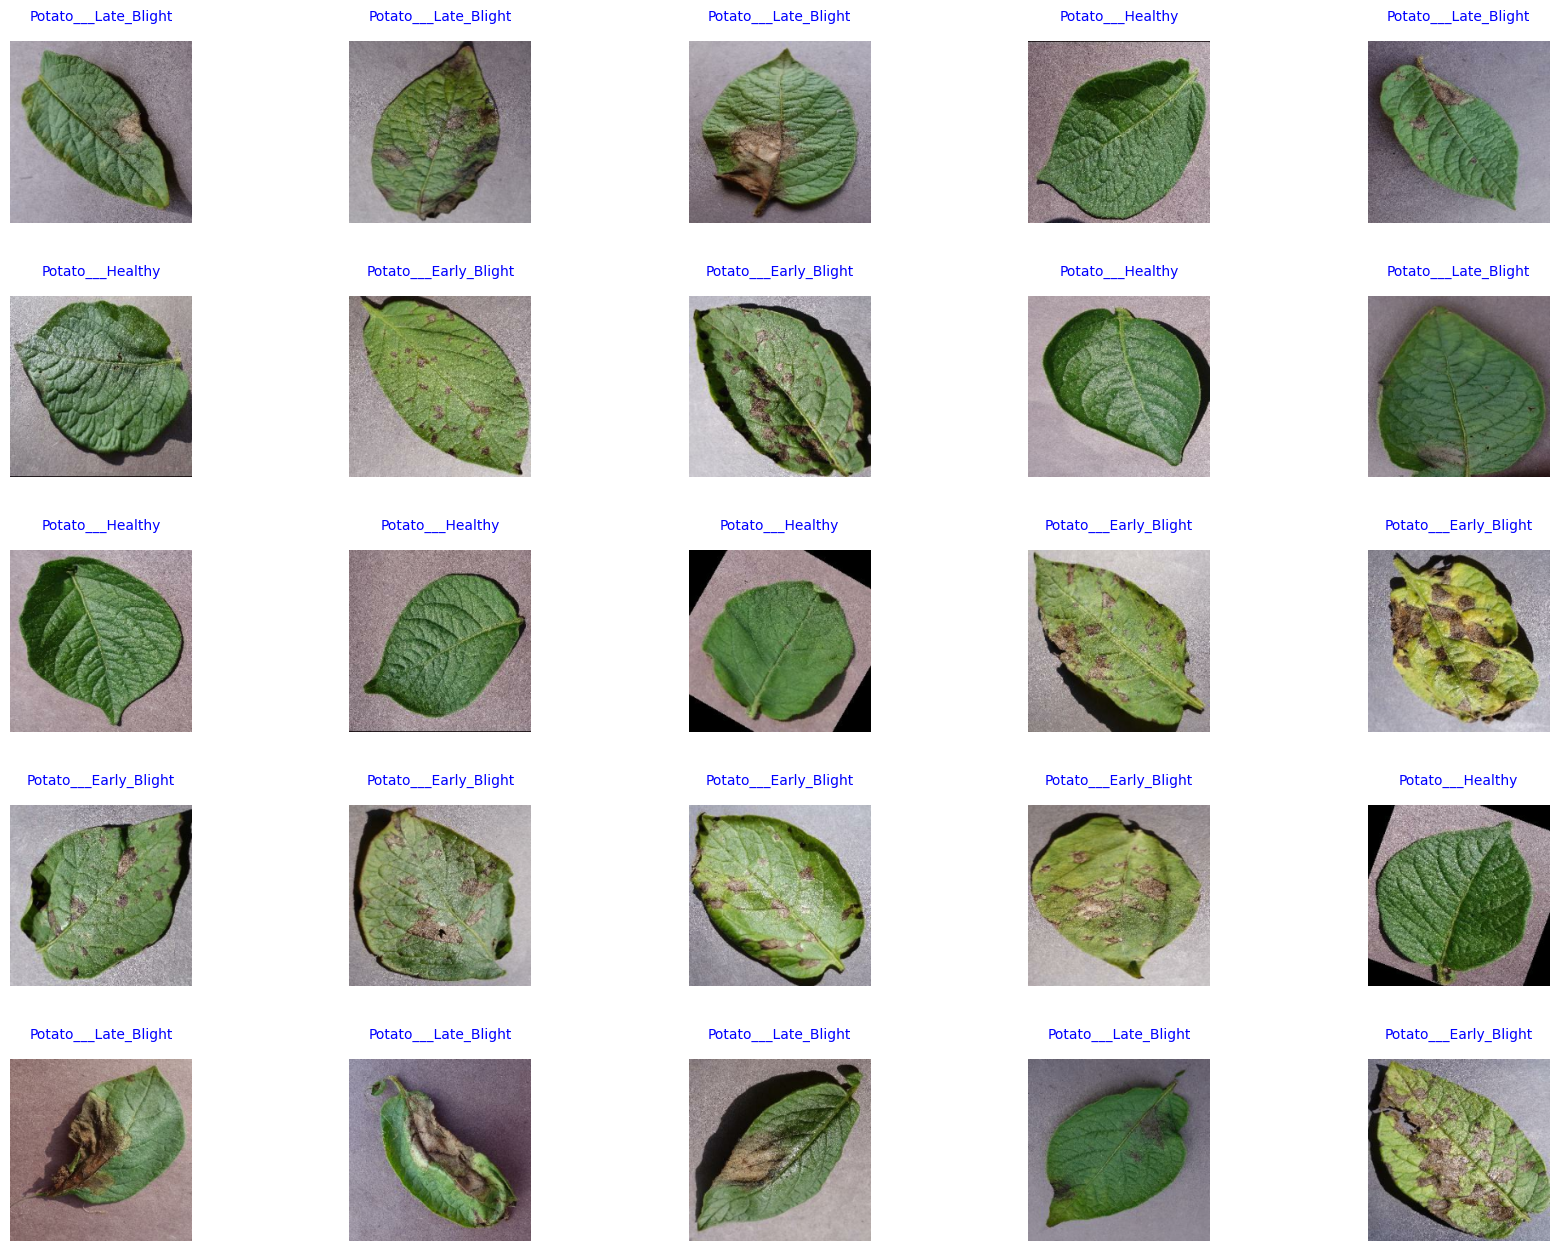

In [ ]:
plt.figure(figsize=(20, 15))
for images, labels in train_dataset.take(1):
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.axis("off")
        im2 = images[i].numpy().astype("uint8")
        img2 = tf.expand_dims(im2, 0)
        predict = Plant_Leaf_Model.predict(img2)
        predicted= class_names[np.argmax(predict)]
        actual = class_names [labels[i].numpy().astype("uint8")]
        if (actual == predicted):
            plt.title(predicted, fontsize=10, color= 'blue', pad=15);
        else :
            plt.title(actual, fontsize=10, color= 'red' ,pad=15);
        plt.subplots_adjust(left=0.1,bottom=0.1, right=0.9,
                            top=0.9, wspace=0.4,hspace=0.4)

**Plotting Accuracy**

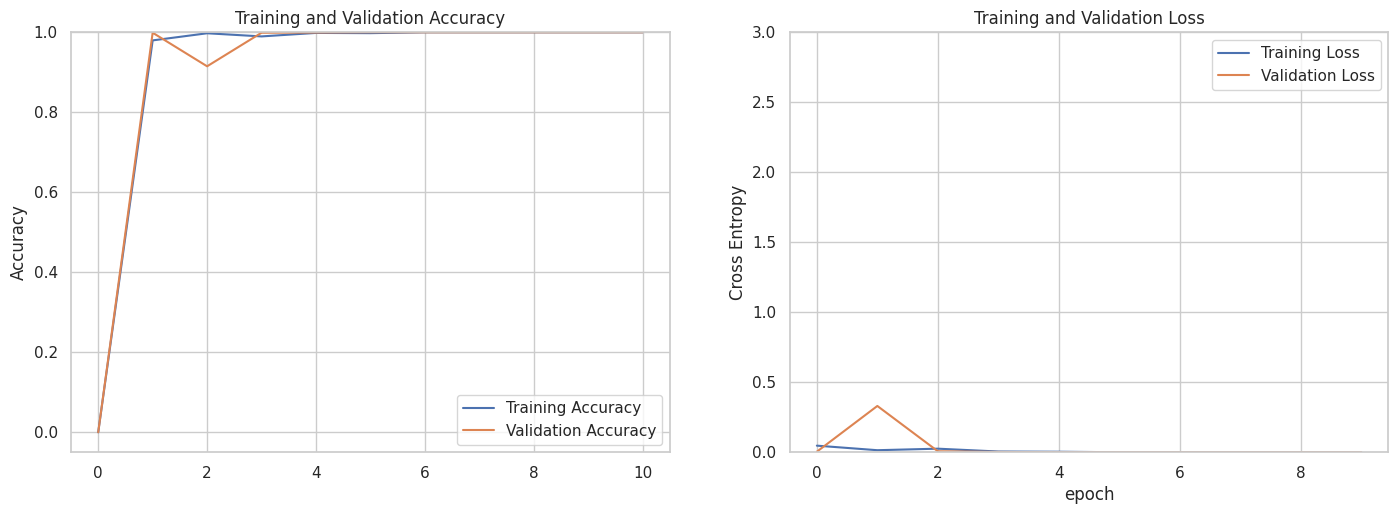

In [ ]:
acc = [0.] + history.history['accuracy']
val_acc = [0.] + history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(17, 12))
plt.subplot(2, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,3.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

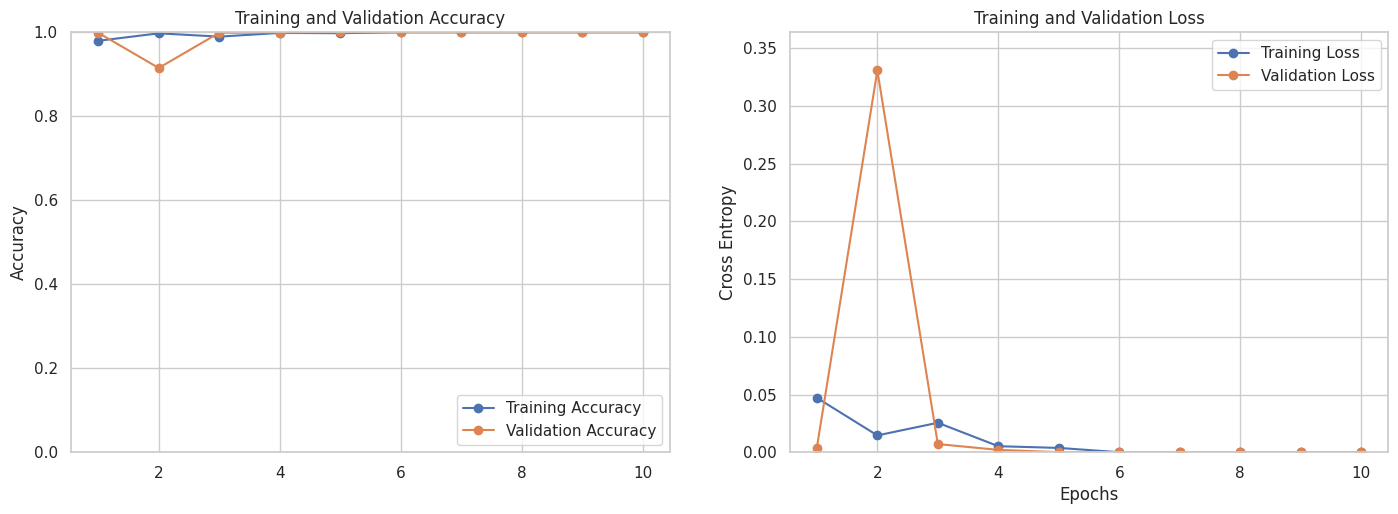

In [ ]:
import matplotlib.pyplot as plt

# Extract history data properly
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get number of epochs
epochs = range(1, len(acc) + 1)

plt.figure(figsize=(17, 12))

# Plot Training and Validation Accuracy
plt.subplot(2, 2, 1)
plt.plot(epochs, acc, label='Training Accuracy', marker='o')
plt.plot(epochs, val_acc, label='Validation Accuracy', marker='o')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([0, 1])  # Ensure limits are correct
plt.title('Training and Validation Accuracy')

# Plot Training and Validation Loss
plt.subplot(2, 2, 2)
plt.plot(epochs, loss, label='Training Loss', marker='o')
plt.plot(epochs, val_loss, label='Validation Loss', marker='o')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0, max(max(loss), max(val_loss)) * 1.1])  # Dynamic ylim
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')

plt.show()


1/1 [==============================] - 2s 2s/step


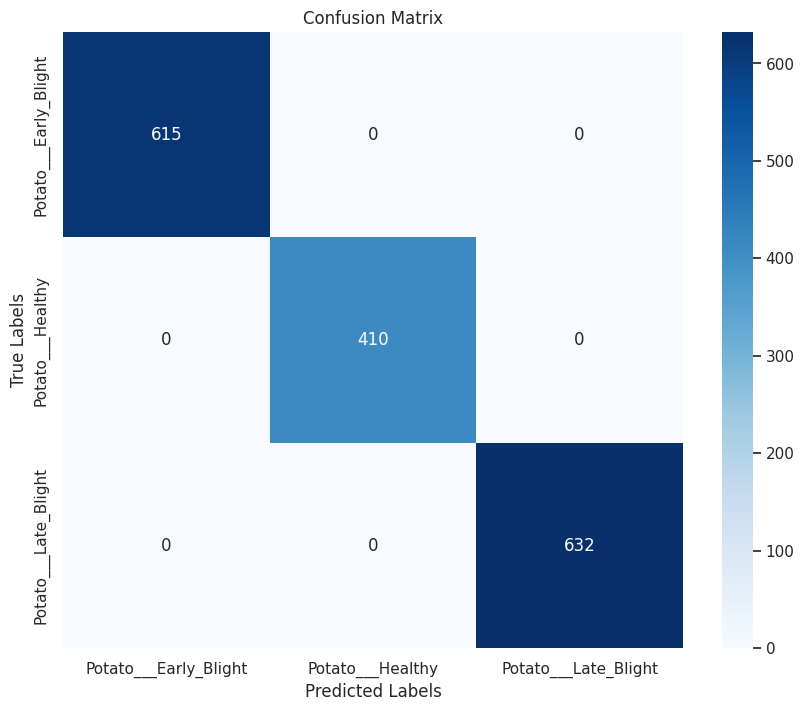

Confusion Matrix:
[[615   0   0]
 [  0 410   0]
 [  0   0 632]]


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Get the true labels and predicted labels
true_labels = []
predicted_labels = []

for images, labels in validation_dataset:
    predictions = Plant_Leaf_Model.predict(images)
    predicted_classes = np.argmax(predictions, axis=1)
    true_labels.extend(labels.numpy())
    predicted_labels.extend(predicted_classes)

# Compute confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Print confusion matrix separately
print("Confusion Matrix:")
print(conf_matrix)




In [ ]:
# Print classification report separately
print("Classification Report:")
report = classification_report(true_labels, predicted_labels, target_names=class_names)
print(report)

Classification Report:
                       precision    recall  f1-score   support

Potato___Early_Blight       1.00      1.00      1.00       615
     Potato___Healthy       1.00      1.00      1.00       410
 Potato___Late_Blight       1.00      1.00      1.00       632

             accuracy                           1.00      1657
            macro avg       1.00      1.00      1.00      1657
         weighted avg       1.00      1.00      1.00      1657

